# Task2 读数据 数据分析

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
#读数据
df = pd.read_csv("data//train_set.csv",sep = '\t')
df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


In [7]:
#统计新闻长度
df['textLen'] = df['text'].apply(lambda x: len(x))

In [8]:
df.head()

,label,text,textLen
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...,5120
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...,2328
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...,3702
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...,7622
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...,1494


In [4]:
#数据分析-查看以下三项
# 文本的长度是多少？
# 类别分布？
# 字符分布？

G:\ph\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
G:\ph\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'文本长度分布')

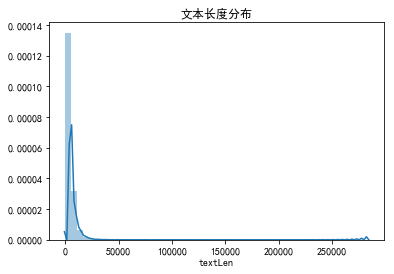

In [11]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
sns.distplot(df['textLen'])
plt.title("文本长度分布")


In [12]:
#由文本长度直方图可知新闻长度分布不均，处理时要扔掉一部分短的，其它的做截取和补长

Text(0.5,1,'新闻类型分布')

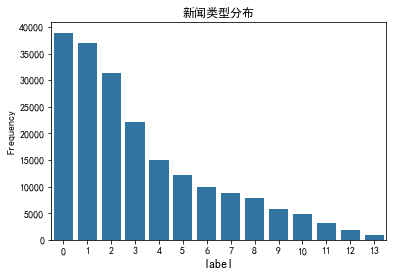

In [13]:
#看下各类新闻中文章数量分布情况
color = sns.color_palette()
sns.countplot(df['label'], color = color[0])#数各类别数据条数
plt.xlabel('label',fontsize = 12)
plt.ylabel('Frequency')
plt.title("新闻类型分布")


In [14]:
#由图可见13类新闻较少，0类新闻较多
#{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}

In [4]:
#查看字符分布
#把所有数据拼起来，统计字符
all_lines = ' '.join(list(df['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)
print(f"涉及词汇量：{len(word_count)}")
print(f"最多的词编号，个数：{word_count[0]}" )
print(f"最少的词编码号，个数：{word_count[-1]}")


涉及词汇量：6869
最多的词编号，个数：('3750', 7482224)
最少的词编码号，个数：('3133', 1)


In [5]:
#统计词频top10词汇

top10=pd.DataFrame(word_count[0:10])
top10.columns=['词汇编码','频率']
top10

,词汇编码,频率
0,3750,7482224
1,648,4924890
2,900,3262544
3,3370,2020958
4,6122,1602363
5,4464,1544962
6,7399,1455864
7,4939,1387951
8,3659,1251253
9,4811,1159401


Text(0.5,1,'top10 word')

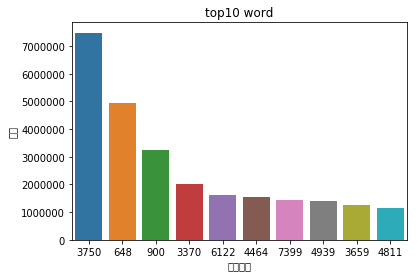

In [8]:
sns.barplot(top10['词汇编码'],top10['频率'],order=top10['词汇编码'])
plt.title("top10 word")

In [11]:
#由统计可知：3750，648，900排名前三的很可能是标点符号


In [12]:
#【分析总结：
# 文本的长度不均需截断补齐；
# 样本类别数据分布不均影响精度，需均衡处理，少的复制，或去掉，多的去掉一些；
# 字符去除高频低频；】